# S5 classification and regression test on symbol sequences

The input sequence is a 9-char sequence of A, B, C, e.g. BCACBAACB.

The classification target (output) is whether there are at least 5 A's, e.g.

BCACBAACB -> 0

ACACAAACB -> 1

The regression target is the number of A's divided by 9, e.g.

BCACBAACB -> .3333...

ACACAAACB -> .5555...

AAAAAAAAA -> 1.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

import jax
print('Using', jax.devices()[0].platform)

from disp import get_line, set_color, set_plot
from run_train import TrainArgs, train

cc = np.concatenate

if not os.path.exists('epochs_clf'):
    os.makedirs('epochs_clf')
if not os.path.exists('epochs_rgr'):
    os.makedirs('epochs_rgr')

Using gpu


## Classification test

In [2]:
DATA_DIR = 'token/clf'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_clf", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='clf_token', dt_global=True, epochs=10, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_clf...
[*] Setting Randomness...
[*] Generating Token Sequence Classification Dataset


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating val split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Casting the dataset:   0%|          | 0/800 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Vcab size: 6
[*] Starting S5 clf_token training on `token/clf` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)
configuring standard optimization setup
[*] Trainable Parameters: 1802


/scratch/gpfs/rp21/s5-della/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:02<00:00, 10.11it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:02<00:00,  2.39it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 418.13it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 0.43866 -- Val Loss: 0.47687 --Test Loss: 0.47687 -- Val Accuracy: 0.8750 -- Test Accuracy: 0.8750
	Best Val Loss: 0.47687 -- Best Val Accuracy: 0.8750 at Epoch 1
	Best Test Loss: 0.47687 -- Best Test Accuracy: 0.8750 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 297.07it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 431.39it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 433.83it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.27697 -- Val Loss: 0.28046 --Test Loss: 0.28046 -- Val Accuracy: 0.8900 -- Test Accuracy: 0.8900
	Best Val Loss: 0.28046 -- Best Val Accuracy: 0.8900 at Epoch 2
	Best Test Loss: 0.28046 -- Best Test Accuracy: 0.8900 at Epoch 2

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 291.91it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 421.28it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 438.12it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.14337 -- Val Loss: 0.12211 --Test Loss: 0.12211 -- Val Accuracy: 0.9950 -- Test Accuracy: 0.9950
	Best Val Loss: 0.12211 -- Best Val Accuracy: 0.9950 at Epoch 3
	Best Test Loss: 0.12211 -- Best Test Accuracy: 0.9950 at Epoch 3

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 290.10it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 443.17it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 435.58it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.08092 -- Val Loss: 0.06087 --Test Loss: 0.06087 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.06087 -- Best Val Accuracy: 1.0000 at Epoch 4
	Best Test Loss: 0.06087 -- Best Test Accuracy: 1.0000 at Epoch 4

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 292.67it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 445.53it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 443.14it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.06611 -- Val Loss: 0.03575 --Test Loss: 0.03575 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.03575 -- Best Val Accuracy: 1.0000 at Epoch 4
	Best Test Loss: 0.06087 -- Best Test Accuracy: 1.0000 at Epoch 4

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 287.60it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 451.64it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 444.43it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.08496 -- Val Loss: 0.03188 --Test Loss: 0.03188 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.03188 -- Best Val Accuracy: 1.0000 at Epoch 4
	Best Test Loss: 0.06087 -- Best Test Accuracy: 1.0000 at Epoch 4

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 293.11it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 441.03it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 455.74it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.05178 -- Val Loss: 0.02553 --Test Loss: 0.02553 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.02553 -- Best Val Accuracy: 1.0000 at Epoch 4
	Best Test Loss: 0.06087 -- Best Test Accuracy: 1.0000 at Epoch 4

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 292.57it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 452.82it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 441.04it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.07716 -- Val Loss: 0.02273 --Test Loss: 0.02273 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.02273 -- Best Val Accuracy: 1.0000 at Epoch 4
	Best Test Loss: 0.06087 -- Best Test Accuracy: 1.0000 at Epoch 4

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 292.44it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 422.18it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 460.40it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.05337 -- Val Loss: 0.02216 --Test Loss: 0.02216 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.02216 -- Best Val Accuracy: 1.0000 at Epoch 4
	Best Test Loss: 0.06087 -- Best Test Accuracy: 1.0000 at Epoch 4

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 293.66it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 435.41it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 437.20it/s]


=>> Epoch 10 Metrics ===
	Train Loss: 0.05319 -- Val Loss: 0.01797 --Test Loss: 0.01797 -- Val Accuracy: 1.0000 -- Test Accuracy: 1.0000
	Best Val Loss: 0.01797 -- Best Val Accuracy: 1.0000 at Epoch 4
	Best Test Loss: 0.06087 -- Best Test Accuracy: 1.0000 at Epoch 4



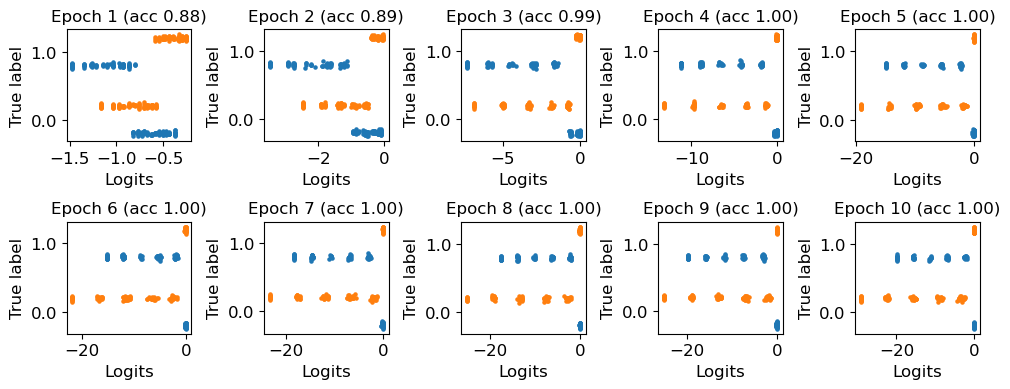

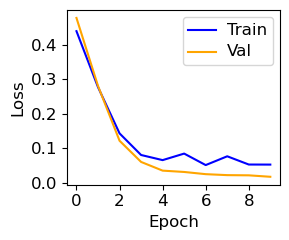

In [3]:
from disp import colors

# load results
fig, axs = plt.subplots(2, 5, figsize=(10, 4), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_clf/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    acc = np.mean(targs == preds.argmax(1))
    
    labels = np.sort(np.unique(targs))
    y_ticks = []
    
    for clabel_0, label_0 in enumerate(labels):
        for clabel_1, label_1 in enumerate(labels):
            logits = preds[targs==label_0, clabel_1]
            display_jitter = .02*np.random.randn(len(logits))
            ax.scatter(logits, np.zeros(len(logits)) + clabel_0 + .8*clabel_1/len(labels) + display_jitter, c=colors[clabel_1], s=5)
            
        y_ticks.append(clabel_0 + .2)
    
    set_plot(ax, y_ticks=y_ticks, y_tick_labels=labels, x_label='Logits', y_label='True label', title=f'Epoch {cepoch+1} (acc {acc:.2f})')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')

# Regression test

In [4]:
DATA_DIR = 'token/rgr'
# DATA_DIR = os.path.join(DATA_DIR, 'scrambled')  # use scrambled data (control)

args = TrainArgs(
    C_init='trunc_standard_normal', batchnorm=True, bidirectional=True,
    epoch_save_dir="epochs_rgr", save_training=1, 
    blocks=16, bsz=32, d_model=8, clear_cache=True, data_dir=DATA_DIR,
    problem_type='rgr_token', dt_global=True, epochs=10, jax_seed=5464358, lr_factor=2, n_layers=1,
    opt_config='standard', p_dropout=0.0, ssm_lr_base=0.001, ssm_size_base=64,
    warmup_end=0, weight_decay=0.05, cosine_anneal=False)

train(args)

Deleting saved epoch files from epochs_rgr...
[*] Setting Randomness...
[*] Generating Token Sequence Regression Dataset


Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating val split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Generating test split: 0 examples [00:00, ? examples/s]

/home/rp21/.conda/envs/s5-gpu-test/lib/python3.11/site-packages/datasets/download/streaming_download_manager.py:765: FutureWarning: The 'verbose' keyword in pd.read_csv is deprecated and will be removed in a future version.
  return pd.read_csv(xopen(filepath_or_buffer, "rb", download_config=download_config), **kwargs)


Casting the dataset:   0%|          | 0/800 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Casting the dataset:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/800 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/800 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Saving the dataset (0/1 shards):   0%|          | 0/200 [00:00<?, ? examples/s]

Vocab size: 6
[*] Starting S5 rgr_token training on `token/rgr` =>> Initializing...
Lambda.shape=(32,)
V.shape=(64, 32)
Vinv.shape=(32, 64)


/scratch/gpfs/rp21/s5-della/s5/train_helpers.py:244: FutureWarning: jax.tree_leaves is deprecated, and will be removed in a future release. Use jax.tree_util.tree_leaves instead.
  print(f"[*] Trainable Parameters: {sum(jax.tree_leaves(param_sizes))}")


configuring standard optimization setup
[*] Trainable Parameters: 1793
[*] Starting Training Epoch 1...
using constant lr for epoch 1


100%|██████████| 25/25 [00:02<00:00, 11.20it/s]


[*] Running Epoch 1 Validation...


100%|██████████| 7/7 [00:03<00:00,  2.20it/s]


[*] Running Epoch 1 Test...


100%|██████████| 7/7 [00:00<00:00, 405.61it/s]



=>> Epoch 1 Metrics ===
	Train Loss: 0.50502 -- Val Loss: 0.39992 --Test Loss: 0.39992 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.39992 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 2...
using constant lr for epoch 2


100%|██████████| 25/25 [00:00<00:00, 298.30it/s]


[*] Running Epoch 2 Validation...


100%|██████████| 7/7 [00:00<00:00, 422.78it/s]


[*] Running Epoch 2 Test...


100%|██████████| 7/7 [00:00<00:00, 444.38it/s]



=>> Epoch 2 Metrics ===
	Train Loss: 0.17593 -- Val Loss: 0.19188 --Test Loss: 0.19188 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.19188 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 3...
using constant lr for epoch 3


100%|██████████| 25/25 [00:00<00:00, 293.35it/s]


[*] Running Epoch 3 Validation...


100%|██████████| 7/7 [00:00<00:00, 445.48it/s]


[*] Running Epoch 3 Test...


100%|██████████| 7/7 [00:00<00:00, 427.55it/s]



=>> Epoch 3 Metrics ===
	Train Loss: 0.05933 -- Val Loss: 0.11137 --Test Loss: 0.11137 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.11137 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 4...
using constant lr for epoch 4


100%|██████████| 25/25 [00:00<00:00, 296.31it/s]


[*] Running Epoch 4 Validation...


100%|██████████| 7/7 [00:00<00:00, 427.89it/s]


[*] Running Epoch 4 Test...


100%|██████████| 7/7 [00:00<00:00, 425.32it/s]



=>> Epoch 4 Metrics ===
	Train Loss: 0.03900 -- Val Loss: 0.04563 --Test Loss: 0.04563 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.04563 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 5...
using constant lr for epoch 5


100%|██████████| 25/25 [00:00<00:00, 290.56it/s]


[*] Running Epoch 5 Validation...


100%|██████████| 7/7 [00:00<00:00, 426.99it/s]


[*] Running Epoch 5 Test...


100%|██████████| 7/7 [00:00<00:00, 449.39it/s]



=>> Epoch 5 Metrics ===
	Train Loss: 0.04114 -- Val Loss: 0.04954 --Test Loss: 0.04954 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.04563 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 6...
using constant lr for epoch 6


100%|██████████| 25/25 [00:00<00:00, 293.96it/s]


[*] Running Epoch 6 Validation...


100%|██████████| 7/7 [00:00<00:00, 439.27it/s]


[*] Running Epoch 6 Test...


100%|██████████| 7/7 [00:00<00:00, 439.70it/s]



=>> Epoch 6 Metrics ===
	Train Loss: 0.05094 -- Val Loss: 0.02223 --Test Loss: 0.02223 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02223 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 7...
using constant lr for epoch 7


100%|██████████| 25/25 [00:00<00:00, 302.93it/s]


[*] Running Epoch 7 Validation...


100%|██████████| 7/7 [00:00<00:00, 447.71it/s]


[*] Running Epoch 7 Test...


100%|██████████| 7/7 [00:00<00:00, 440.66it/s]



=>> Epoch 7 Metrics ===
	Train Loss: 0.02809 -- Val Loss: 0.02699 --Test Loss: 0.02699 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.02223 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 8...
using constant lr for epoch 8


100%|██████████| 25/25 [00:00<00:00, 300.08it/s]


[*] Running Epoch 8 Validation...


100%|██████████| 7/7 [00:00<00:00, 434.05it/s]


[*] Running Epoch 8 Test...


100%|██████████| 7/7 [00:00<00:00, 447.87it/s]



=>> Epoch 8 Metrics ===
	Train Loss: 0.04049 -- Val Loss: 0.01431 --Test Loss: 0.01431 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.01431 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 9...
using constant lr for epoch 9


100%|██████████| 25/25 [00:00<00:00, 302.20it/s]


[*] Running Epoch 9 Validation...


100%|██████████| 7/7 [00:00<00:00, 428.75it/s]


[*] Running Epoch 9 Test...


100%|██████████| 7/7 [00:00<00:00, 431.50it/s]



=>> Epoch 9 Metrics ===
	Train Loss: 0.03237 -- Val Loss: 0.02567 --Test Loss: 0.02567 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.01431 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1

[*] Starting Training Epoch 10...
using constant lr for epoch 10


100%|██████████| 25/25 [00:00<00:00, 294.93it/s]


[*] Running Epoch 10 Validation...


100%|██████████| 7/7 [00:00<00:00, 431.35it/s]


[*] Running Epoch 10 Test...


100%|██████████| 7/7 [00:00<00:00, 452.68it/s]


=>> Epoch 10 Metrics ===
	Train Loss: 0.03852 -- Val Loss: 0.00984 --Test Loss: 0.00984 -- Val Accuracy: nan -- Test Accuracy: nan
	Best Val Loss: 0.00984 -- Best Val Accuracy: -100000000.0000 at Epoch 1
	Best Test Loss: 100000000.00000 -- Best Test Accuracy: -10000.0000 at Epoch 1



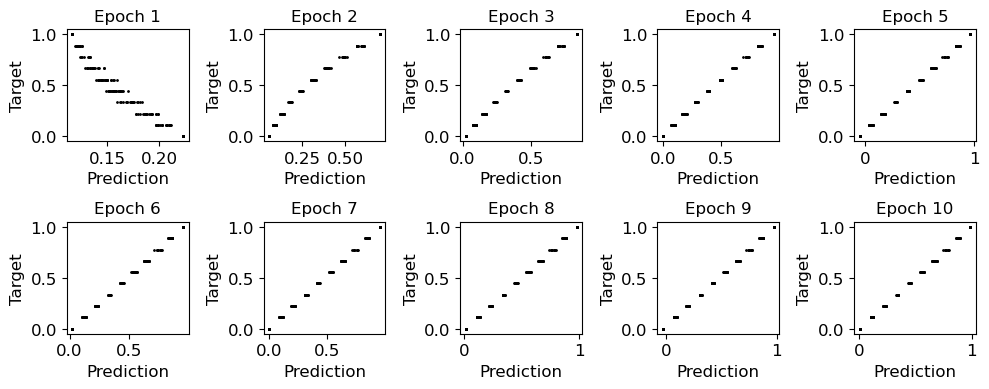

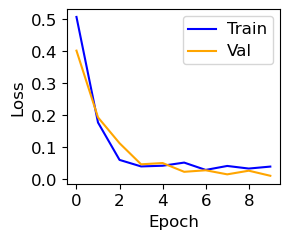

In [5]:
# load results
fig, axs = plt.subplots(2, 5, figsize=(10, 4), tight_layout=True)

train_losses = []
val_losses = []

for cepoch, ax in enumerate(axs.flatten()):
    data = np.load(f'epochs_rgr/epoch_{cepoch}.npy', allow_pickle=True)[0]
    
    targs = data['val_targ']
    preds = data['val_pred']
    
    ax.scatter(preds, targs, c='k', s=1)
    
    set_plot(ax, x_label='Prediction', y_label='Target', title=f'Epoch {cepoch+1}')
    
    train_losses.append(data['train_loss'])
    val_losses.append(data['val_loss'])
    
fig, ax = plt.subplots(1, 1, figsize=(3, 2.5), tight_layout=True)
ax.plot(train_losses, c='b')
ax.plot(val_losses, c='orange')
ax.legend(['Train', 'Val'])
set_plot(ax, x_label='Epoch', y_label='Loss')